In [46]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [47]:
import matplotlib.pyplot as plt

In [53]:
import numpy as np


X_2 = 25
#radius = np.linspace(0, 300, 151)

def X_1_f(V_max, phi):
        X_1 = 317.1 - 2.026 * V_max + 1.915 * phi
        return X_1

def n_f(V_max, phi):
        n = 0.4067 + 0.0144 * V_max - 0.0038 * phi
        return n

def A_f(V_max, phi):
        A = 0.0696 + 0.0049 * V_max - 0.0064 * phi
        return A

def V_i_f(r, V_max, R_max, n):
        V_i = V_max * ((r/R_max) ** n)
        return V_i

def V_o_f(r, V_max, R_max, A, X_1, X_2):
        V_o = V_max * ((1 - A) * np.exp((r - R_max)/(- X_1)) + A * np.exp((r - R_max)/(- X_2)))
        return V_o

def W_f(r, R_1, R_2):
        e = (r - R_1)/(R_2 - R_1)
        W = 126 * (e ** 5) - 420 * (e ** 6) + 540 * (e ** 7) - 315 * (e ** 8) + 70 * (e ** 9)
        return W

def W_profile(lat, R_max, V_max, radius_max, radius_precision):
        radius = np.arange(0,radius_max + radius_precision, radius_precision) #added by Jane  7-16-20

        phi = lat
        ind = np.round(R_max/radius_precision, 0)
        width = 8/radius_precision # assumes 16 km width of transition zone
        r_1_id = int(max(ind-width, 0))
        r_2_id = int(min(ind+width, radius_max/radius_precision))
        R_1 = radius[r_1_id,]
        R_2 = radius[r_2_id,]
        X_1 = X_1_f(V_max, phi)
        n = n_f(V_max, phi)
        A = A_f(V_max, phi)
        A = max(A, 0)

        if R_max == 0:
                profile = V_o_f(radius, V_max, R_max, A, X_1, X_2)
        else:
                v_i = V_i_f(radius[:r_1_id+1], V_max, R_max, n)
                v_o = V_o_f(radius[r_2_id:], V_max, R_max, A, X_1, X_2)
                transition_i = V_i_f(radius[r_1_id+1:r_2_id], V_max, R_max, n)
                transition_o = V_o_f(radius[r_1_id+1:r_2_id], V_max, R_max, A, X_1, X_2)
                w = W_f(radius[r_1_id+1:r_2_id], R_1, R_2)
                v_t = transition_i * (1 - w) + transition_o * (w)
                profile = np.concatenate([v_i, v_t, v_o])
        return profile


/home/jbaldwin/.conda/envs/worldbank/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


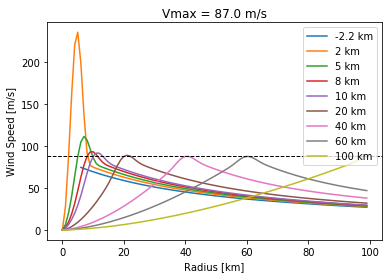

In [81]:
n = 63
lati = 10.2
rmaxi = [-2.2,2,5,8,10,20,40,60,100]#rmax_nS[n]
wspdi = 87.4
radius_max = 500
radius_precision = 1
for rmax in rmaxi:
    profile = W_profile(lati, rmax, wspdi, radius_max, radius_precision)
    radius = np.arange(0,radius_max + radius_precision, radius_precision)
    #plt.plot(radius[0:r_1_id+1],v_i,label=str(np.round(rmax,decimals=1))+' km')
    #plt.plot(radius[r_1_id+1:r_2_id],v_t)
    #plt.plot(radius[r_2_id:],v_o)
    plt.plot(radius[:100],profile[:100],label=str(np.round(rmax,decimals=1))+' km')
plt.xlabel('Radius [km]')
plt.ylabel('Wind Speed [m/s]')
plt.title('Vmax = '+str(np.round(wspdi))+' m/s')
plt.legend()
plt.axhline(wspdi,linewidth=1,linestyle='--',color='k')